# Objet

Répétition et adaptation des exemples de la galerie Seaborn.

## [Seaborn gallery](https://seaborn.pydata.org/examples/index.html)

## Libs

In [2]:
import os
from sns_jpy_commons import *

[project_dir]\data\ exists
[project_dir]\data\csv\ exists


# Catégories de diagrammes

## Diagrammes relationnels
* ✔ relplot - Figure-level interface for drawing relational plots onto a FacetGrid.
* ✔ scatterplot - Draw a scatter plot with possibility of several semantic groupings.
* lineplot - Draw a line plot with possibility of several semantic groupings.

## Diagrammes de distribution
* displot - Figure-level interface for drawing distribution plots onto a FacetGrid.
* ✔ histplot - Plot univariate or bivariate histograms to show distributions of datasets.
* kdeplot - Plot univariate or bivariate distributions using kernel density estimation.
* ecdfplot - Plot empirical cumulative distribution functions.
* rugplot - Plot marginal distributions by drawing ticks along the x and y axes.
* distplot - DEPRECATED

## Diagrammes catégoriels
* catplot - Figure-level interface for drawing categorical plots onto a FacetGrid.
* stripplot - Draw a categorical scatterplot using jitter to reduce overplotting.
* swarmplot - Draw a categorical scatterplot with points adjusted to be non-overlapping.
* boxplot - Draw a box plot to show distributions with respect to categories.
* ✔ violinplot - Draw a combination of boxplot and kernel density estimate.
* boxenplot - Draw an enhanced box plot for larger datasets.
* pointplot - Show point estimates and errors using dot marks.
* ✔ barplot - Show point estimates and errors as rectangular bars.
* countplot - Show the counts of observations in each categorical bin using bars.

## Diagrammes de régression
* ✔ lmplot - Plot data and regression model fits across a FacetGrid.
* regplot - Plot data and a linear regression model fit.
* residplot - Plot the residuals of a linear regression.

## Diagrammes matriciels
* heatmap - Plot rectangular data as a color-encoded matrix.
* ✔ clustermap - Plot a matrix dataset as a hierarchically-clustered heatmap.

## Grilles multi-diagrammes

Facet grids :
* FacetGrid - Multi-plot grid for plotting conditional relationships.

Pair grids :
* pairplot - Plot pairwise relationships in a dataset.
* PairGrid - Subplot grid for plotting pairwise relationships in a dataset.

Joint grids :
* ✔ jointplot - Draw a plot of two variables with bivariate and univariate graphs.
* ✔ JointGrid - Grid for drawing a bivariate plot with marginal univariate plots.

# [relplot] [Carte thermique en nuage de points](https://seaborn.pydata.org/examples/heat_scatter.html)

<mark>Tuto à suivre</mark> : [Visualizing statistical relationships](https://seaborn.pydata.org/tutorial/relational.html#relational-tutorial)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figures](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplot)

## Exemple de la galerie

In [10]:
import seaborn as sns
df = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)
display(df.head())

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values('network')
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map('-'.join)

display(df.columns)

corr_mat = df.corr().stack().reset_index(name='correlation')
display(corr_mat)



network          1                     2                     3             \
node             1                     1                     1              
hemi            lh         rh         lh         rh         lh         rh   
0        56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1        55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2        60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3        18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4        -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   

network          4                     5             ...         16  \
node             1                     1             ...          3   
hemi            lh         rh         lh         rh  ...         rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...   0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...  57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...  28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...  71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...  95.597565   

network                                17                                   \
node             4                      1                     2              
hemi            lh          rh         lh         rh         lh         rh   
0       -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1       -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2         9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3        65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4        50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  

[5 rows x 62 columns]

Index(['1-1-lh', '1-1-rh', '5-1-lh', '5-1-rh', '6-1-lh', '6-1-rh', '6-2-lh',
       '6-2-rh', '7-1-lh', '7-1-rh', '7-2-lh', '7-2-rh', '7-3-lh', '7-3-rh',
       '8-1-lh', '8-1-rh', '8-2-lh', '8-2-rh', '8-3-lh', '8-3-rh', '12-1-lh',
       '12-1-rh', '12-2-lh', '12-2-rh', '12-3-lh', '13-1-lh', '13-1-rh',
       '13-2-lh', '13-2-rh', '13-3-rh', '13-4-rh', '17-1-lh', '17-1-rh',
       '17-2-lh', '17-2-rh', '17-3-lh', '17-3-rh', '17-4-lh'],
      dtype='object')

,level_0,level_1,correlation
0,1-1-lh,1-1-lh,1.000000
1,1-1-lh,1-1-rh,0.881516
2,1-1-lh,5-1-lh,0.431619
3,1-1-lh,5-1-rh,0.418708
4,1-1-lh,6-1-lh,-0.084634
...,...,...,...
1439,17-4-lh,17-2-lh,0.517481
1440,17-4-lh,17-2-rh,0.256544
1441,17-4-lh,17-3-lh,0.264381
1442,17-4-lh,17-3-rh,0.090302


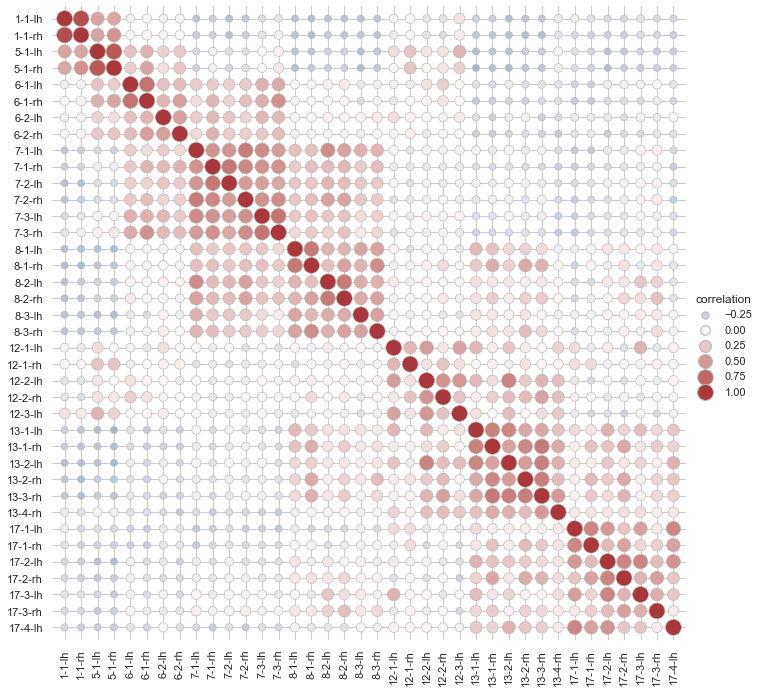

In [11]:
import seaborn as sns
sns.set_theme(style='whitegrid')

# Load the brain networks dataset, select subset, and collapse the multi-index
df = sns.load_dataset('brain_networks', header=[0, 1, 2], index_col=0)

used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
                  .get_level_values('network')
                  .astype(int)
                  .isin(used_networks))
df = df.loc[:, used_columns]

df.columns = df.columns.map('-'.join)

# Compute a correlation matrix and convert to long-form
corr_mat = df.corr().stack().reset_index(name='correlation')

# Draw each cell as a scatter point with varying size and color
g = sns.relplot(
    data=corr_mat,
    x='level_0', y='level_1', hue='correlation', size='correlation',
    palette='vlag', hue_norm=(-1, 1), edgecolor='.7',
    height=10, sizes=(50, 250), size_norm=(-.2, .8),
)

# Tweak the figure to finalize
g.set(xlabel='', ylabel='', aspect='equal')
g.despine(left=True, bottom=True)
g.ax.margins(.02)
for label in g.ax.get_xticklabels():
    label.set_rotation(90)
for artist in g.legend.legendHandles:
    artist.set_edgecolor('.7')

## Exemples de la doc

In [12]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


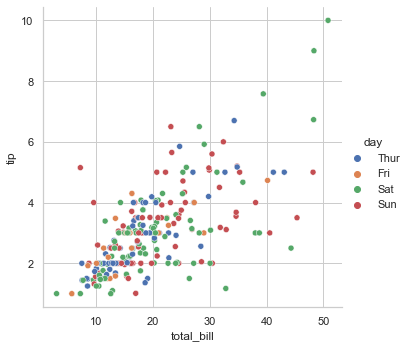

In [13]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day')

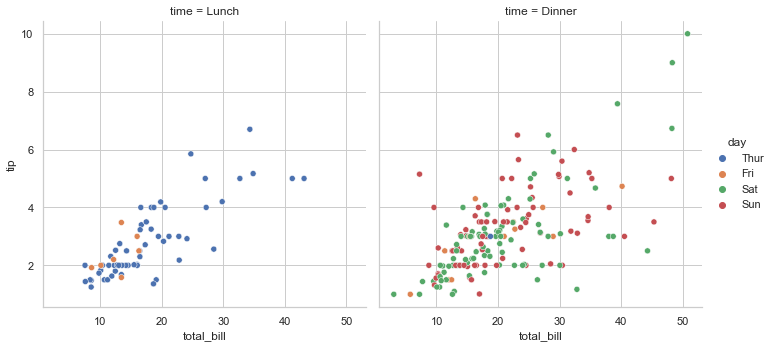

In [16]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time')

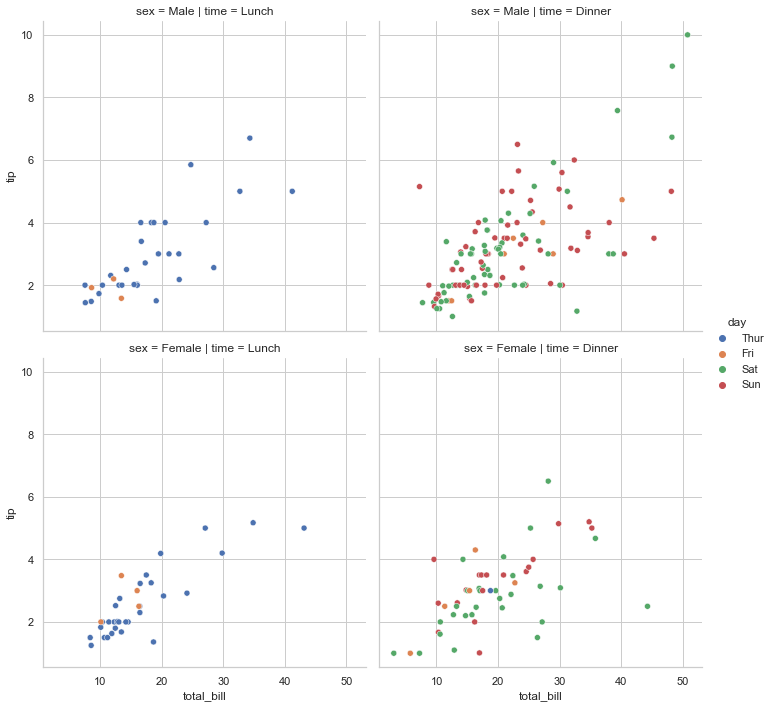

In [17]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='day', col='time', row='sex')

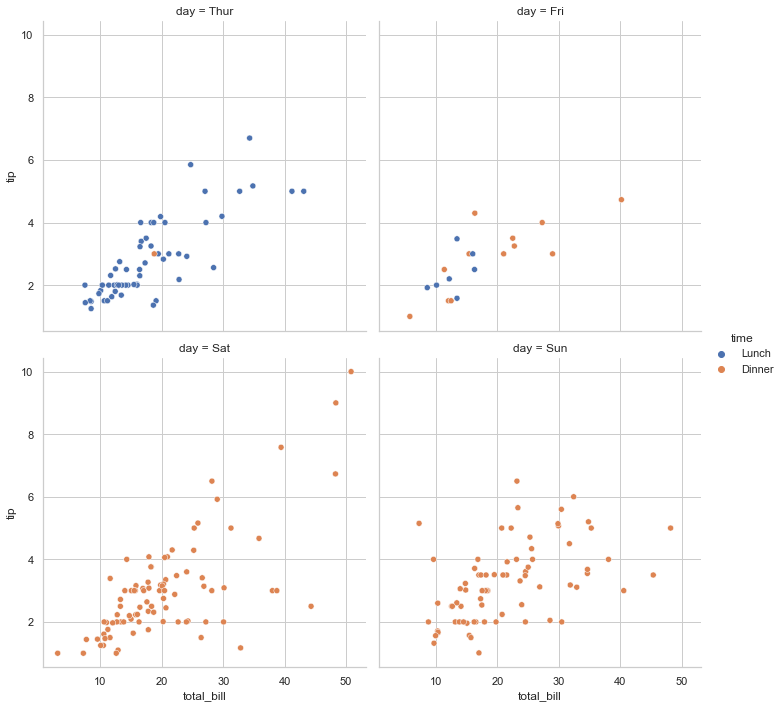

In [18]:
sns.relplot(data=tips, x='total_bill', y='tip', hue='time', col='day', col_wrap=2)

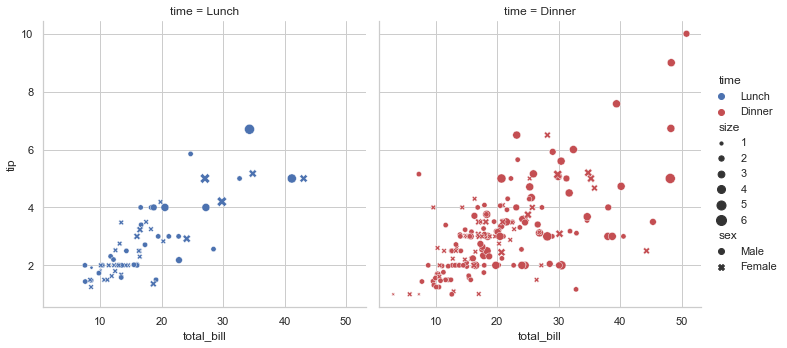

In [19]:
# à éviter (surcharge sémantique)
sns.relplot(
    data=tips, x='total_bill', y='tip', col='time',
    hue='time', size='size', style='sex',
    palette=['b', 'r'], sizes=(10, 100)
)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


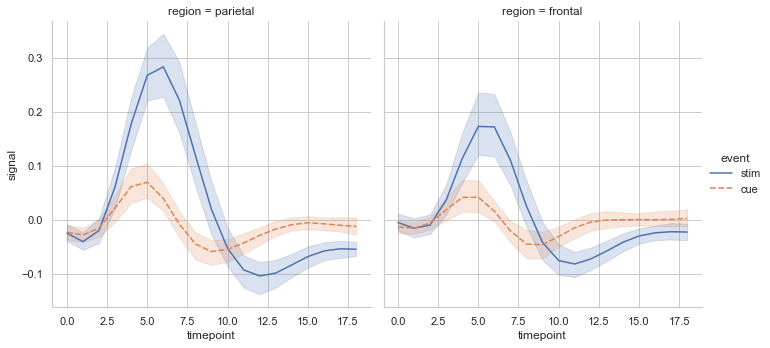

In [20]:
# si continuité naturelle de l'une des variables
fmri = sns.load_dataset('fmri')
display(fmri.head())
sns.relplot(
    data=fmri, x='timepoint', y='signal', col='region',
    hue='event', style='event', kind='line',
)

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


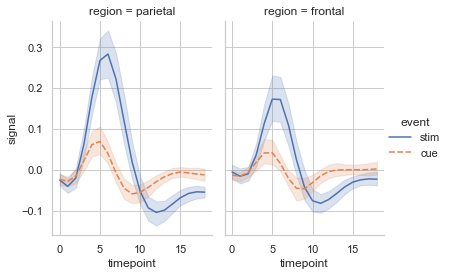

In [21]:
# rapport d'aspect
sns.relplot(
    data=fmri, x='timepoint', y='signal', col='region',
    hue='event', style='event',
    height=4, aspect=.7, kind='line',
)

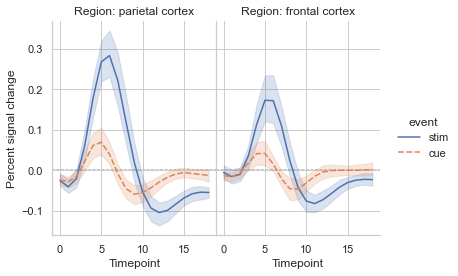

In [22]:
# la fonction de tracé retourne un objet FacetGrid qui permet d'effectuer des ajustements
g = sns.relplot(
    data=fmri, x='timepoint', y='signal', col='region',
    hue='event', style='event',
    height=4, aspect=.7, kind='line',
)

(g.map(plt.axhline, y=0, color='.7', dashes=(2, 1), zorder=0)
  .set_axis_labels('Timepoint', 'Percent signal change')
  .set_titles('Region: {col_name} cortex')
  .tight_layout(w_pad=0))

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


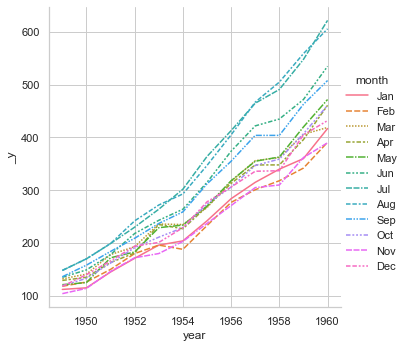

In [23]:
# utilisation avec un jeu de données 'large'
flights_wide = sns.load_dataset('flights').pivot('year', 'month', 'passengers')
display(flights_wide.head())
sns.relplot(data=flights_wide, kind='line')

# [lmplot] [Quartet d'Anscombe](https://seaborn.pydata.org/examples/anscombes_quartet.html)

* https://fr.wikipedia.org/wiki/Quartet_d'Anscombe
* https://en.wikipedia.org/wiki/Anscombe's_quartet


Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figures](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [lmplot](https://seaborn.pydata.org/generated/seaborn.lmplot.html)
    - tuto [Régression](https://seaborn.pydata.org/tutorial/regression.html#regression-tutorial)

In [42]:
# TODO : défi
# voici un nouveau défi à résoudre : le but est de passer de la version sns à celle de wikipedia
# c'est un 'unstack', mais avec deux colonnes (x, y) à considérer comme un tout
# le but est de l'écrire en 3 lignes max
# ceci pourrait aider : https://www.geeksforgeeks.org/pandas-groupby-unstack/

import pandas as pd
ds = sns.load_dataset('anscombe')
#display(ds)
ds2 = ds.copy()
ds2.insert(0, 'id', 0)
#ds2['x_y'] = (ds2.x, ds2.y)
ds2.loc[ds2.dataset == 'I', 'id'] = ds2.id[ds2.dataset == 'I'].index
ds2.loc[ds2.dataset == 'II', 'id'] = ds2.id[ds2.dataset == 'II'].index - 11
ds2.loc[ds2.dataset == 'III', 'id'] = ds2.id[ds2.dataset == 'III'].index - 22
ds2.loc[ds2.dataset == 'IV', 'id'] = ds2.id[ds2.dataset == 'IV'].index - 33
ds2 = ds2.set_index(['id', 'dataset'])
ds2 = ds2.unstack(level=1)
#ds2 = ds2.set_index('dataset')
#ds2 = ds2.groupby(by='dataset').count()
#ds2 = pd.concat([ds[ds.dataset == 'I'], ds[ds.dataset == 'I']], axis=1)
#pt = pd.pivot_table(ds, columns='dataset') #, values=['x', 'y']
#gb = ds.groupby(by='dataset').agg([lambda x: x, lambda y: y])
display(ds2)


x                        y                    
dataset     I    II   III    IV      I    II    III     IV
id                                                        
0        10.0  10.0  10.0   8.0   8.04  9.14   7.46   6.58
1         8.0   8.0   8.0   8.0   6.95  8.14   6.77   5.76
2        13.0  13.0  13.0   8.0   7.58  8.74  12.74   7.71
3         9.0   9.0   9.0   8.0   8.81  8.77   7.11   8.84
4        11.0  11.0  11.0   8.0   8.33  9.26   7.81   8.47
5        14.0  14.0  14.0   8.0   9.96  8.10   8.84   7.04
6         6.0   6.0   6.0   8.0   7.24  6.13   6.08   5.25
7         4.0   4.0   4.0  19.0   4.26  3.10   5.39  12.50
8        12.0  12.0  12.0   8.0  10.84  9.13   8.15   5.56
9         7.0   7.0   7.0   8.0   4.82  7.26   6.42   7.91
10        5.0   5.0   5.0   8.0   5.68  4.74   5.73   6.89

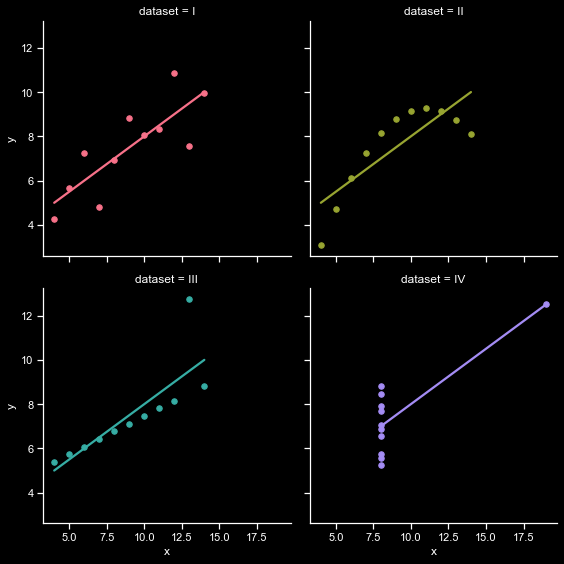

In [53]:
import seaborn as sns
sns.set_theme(style='ticks')


# Load the example dataset for Anscombe's quartet
df = sns.load_dataset('anscombe')

# Show the results of a linear regression within each dataset
sns.lmplot(
    data=df, x='x', y='y', col='dataset', hue='dataset',
    col_wrap=2, palette='husl', ci=None,
    height=4, scatter_kws={'s': 30, 'alpha': 1}
)
plt.show()

# [scatterplot] [Nuage de points avec sémantiques multiples](https://seaborn.pydata.org/examples/different_scatter_variables.html)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [despine](https://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)
    - retire les côtés du cadre (spines = colonne vertébrale), par défaut du haut et de droite, mais peut davantage
* [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

## Exemple de la galerie

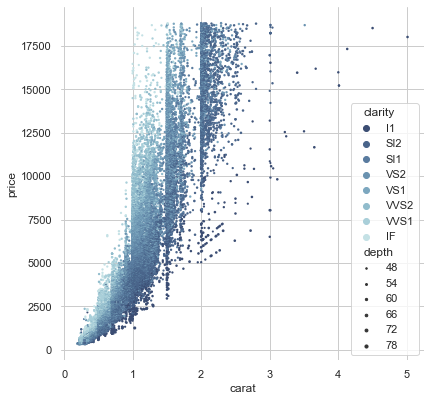

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# mpl.style.use('dark_background')
sns.set_theme(style='whitegrid')

# Load the example diamonds dataset
diamonds = sns.load_dataset('diamonds')

# Draw a scatter plot while assigning point colors and sizes to different
# variables in the dataset
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
clarity_ranking = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']
sns.scatterplot(x='carat', y='price',
                hue='clarity', size='depth',
                palette='ch:r=-.2,d=.3_r',
                hue_order=clarity_ranking,
                sizes=(1, 10), linewidth=0,
                data=diamonds, ax=ax)

plt.show()

## [Exemples de la doc](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

In [18]:
#mpl.style.use('dark_background')
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


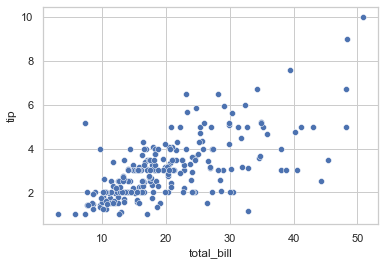

In [19]:
sns.scatterplot(data=tips, x='total_bill', y='tip')
plt.show()

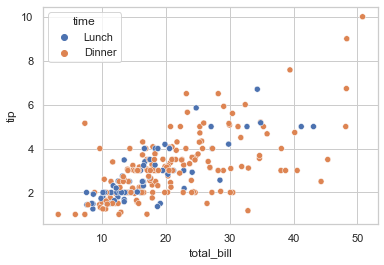

In [20]:
# variation de couleur cf. cats
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time')
plt.show()

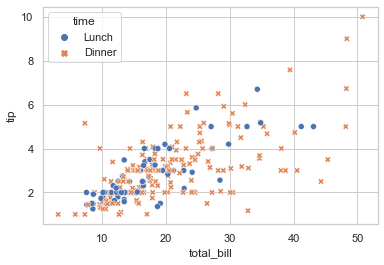

In [21]:
# variation de couleur ET des marqueurs cf. cats
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time')
plt.show()

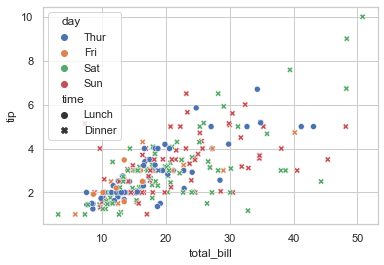

In [23]:
# avec la possibilité de faire varier les deux, couleurs et marqueurs suivant deux listes de cats
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='day', style='time')
plt.show()

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

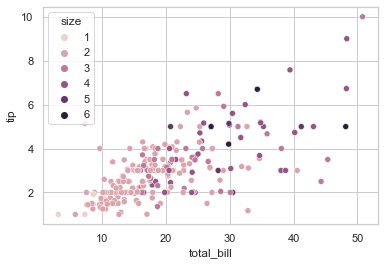

In [24]:
# si utilisation d'une variable numérique pour hue, palette en dégradé
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

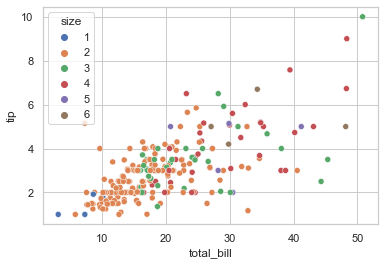

In [25]:
# palette que l'on peut spécifier en remplacement de la palette par défaut
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', palette='deep')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

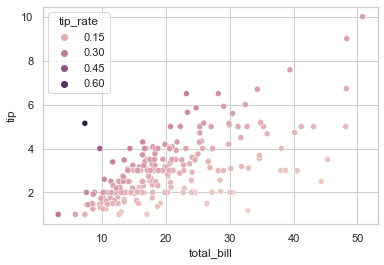

In [26]:
# discrétisation si la variable numérique est très dispersée
tip_rate = tips.eval('tip / total_bill').rename('tip_rate')
sns.scatterplot(data=tips, x='total_bill', y='tip', hue=tip_rate)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

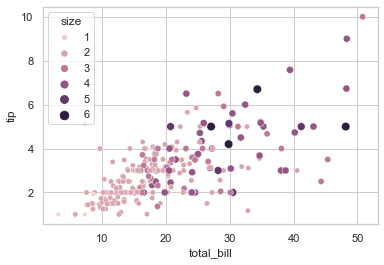

In [27]:
# représentation sémantique : couleurs, styles de marqueurs ET taille des points
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='size', size='size')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

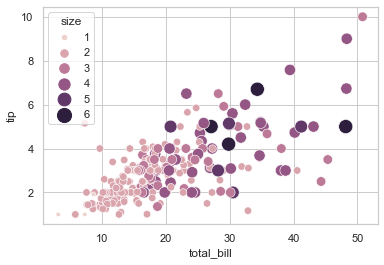

In [28]:
# sizes pour contrôler la taille des points, et legend='full' pour forcer la présence de chq valeur unique
sns.scatterplot(
    data=tips, x='total_bill', y='tip', hue='size', size='size',
    sizes=(20, 200), legend='full'
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

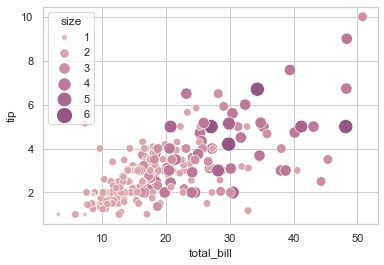

In [37]:
# explications de la doc pas très claires, mais en gros, scaling de la palette
sns.scatterplot(
    data=tips, x="total_bill", y="tip", hue="size", size="size",
    sizes=(20, 200), hue_norm=(0, 10), legend="full"
)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

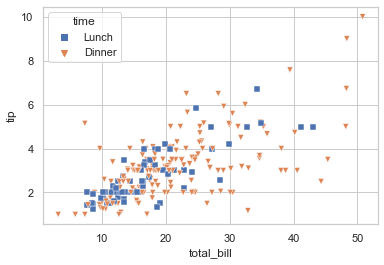

In [49]:
# markers = ['o', 'x', '^', '+', '*', '8', 's', 'p', 'D', 'v']
# contrôle des marqueurs
markers = {'Lunch': 's', 'Dinner': 'v'}
sns.scatterplot(data=tips, x='total_bill', y='tip', hue='time', style='time', markers=markers)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

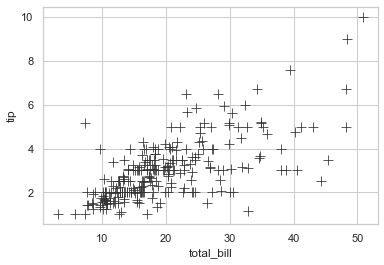

In [50]:
# possibilité de passer les kwargs directement à matplotlib : pas vraiment intéressant^^
# le résultat me semble être volontairement peu sexy en vue de décourager cet usage :D
sns.scatterplot(data=tips, x='total_bill', y='tip', s=100, color='.2', marker='+')

<AxesSubplot:xlabel='date'>

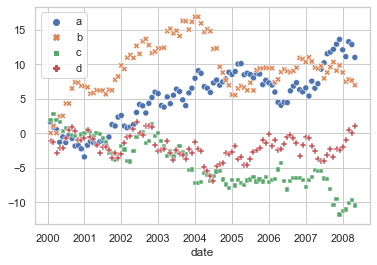

In [56]:
# l'exemple des pourboires est un dataset long.
# hue, style etc sont implicitement appliqués à chaque variable d'un dataset large
import numpy as np
index = pd.date_range('1 1 2000', periods=100, freq='m', name='date')
data = np.random.randn(100, 4).cumsum(axis=0)
wide_df = pd.DataFrame(data, index, ['a', 'b', 'c', 'd'])
sns.scatterplot(data=wide_df)

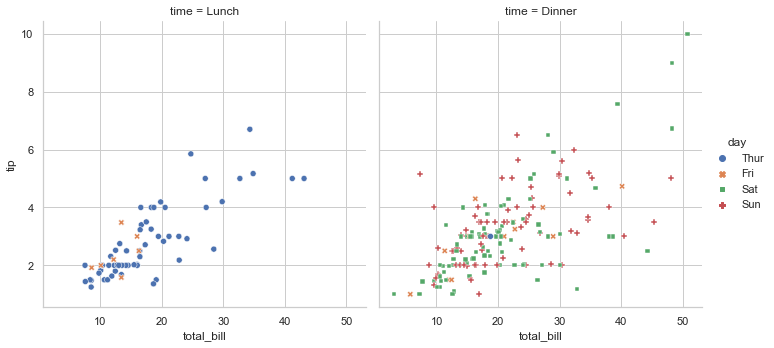

In [57]:
# relplot (wrapper de FacetGrid) pour diviser en plusieurs subplots (avec coordination des distinctions sémantiques)
sns.relplot(
    data=tips, x='total_bill', y='tip',
    col='time', hue='day', style='day',
    kind='scatter'
)

# [histplot] [Histogramme empilé](https://seaborn.pydata.org/examples/histogram_stacked.html)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [despine](https://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)
    - retire les côtés du cadre (spines = colonne vertébrale), par défaut du haut et de droite, mais peut davantage
* [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot)

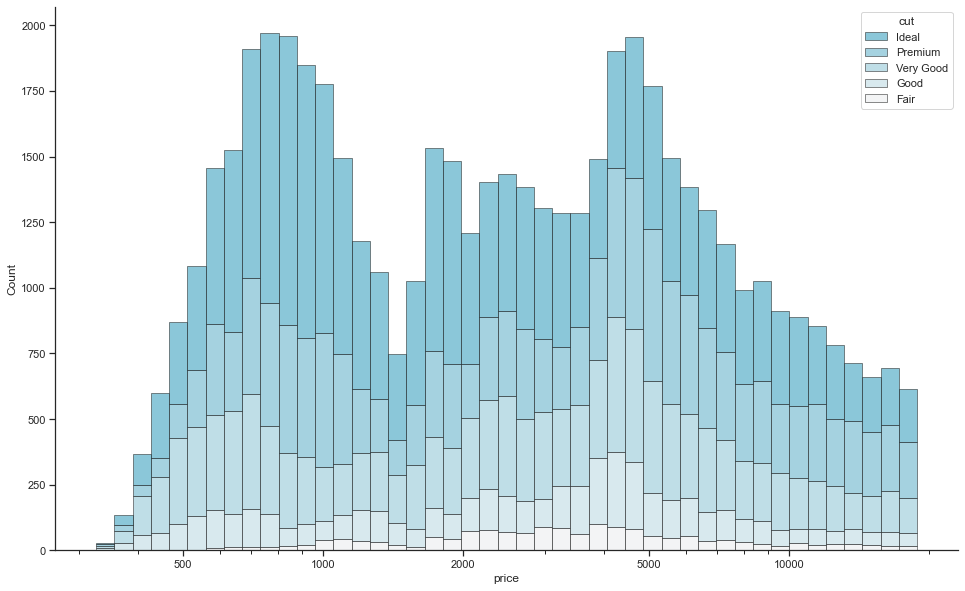

In [4]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
sns.set_theme(style="ticks")                   # faire les tutos Esthétique 

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(16.18, 10))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",        # layer | dodge | stack | fill
    palette="light:c_r",     # palette claire, (m_r) reverse de violet
                             # voir https://matplotlib.org/stable/gallery/color/named_colors.html
    edgecolor=".1",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])
plt.show()

In [3]:
display(diamonds)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


# [barplot] [Barres horizontales](https://seaborn.pydata.org/examples/part_whole_bars.html)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [set_color_codes](https://seaborn.pydata.org/generated/seaborn.set_color_codes.html#seaborn.set_color_codes)
    - pas très compliqué, mérite d'être assimilé une fois pour toutes. Palettes : {deep, muted, pastel, dark, bright, colorblind}
* [despine](https://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)
    - retire les côtés du cadre (spines = colonne vertébrale), par défaut du haut et de droite, mais peut davantage
* [barplot](https://seaborn.pydata.org/generated/seaborn.barplot.html#seaborn.barplot)

In [5]:
display(sns.load_dataset("car_crashes").sort_values("total", ascending=False).head(10))

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
40,23.9,9.082,9.799,22.944,19.359,858.97,116.29,SC
34,23.9,5.497,10.038,23.661,20.554,688.75,109.72,ND
48,23.8,8.092,6.664,23.086,20.706,992.61,152.56,WV
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
17,21.4,4.066,4.922,16.692,16.264,872.51,137.13,KY
26,21.4,8.346,9.416,17.976,18.190,816.21,85.15,MT
18,20.5,7.175,6.765,14.965,20.090,1281.55,194.78,LA
36,19.9,6.368,5.771,18.308,18.706,881.51,178.86,OK
42,19.5,4.095,5.655,15.990,15.795,767.91,155.57,TN
43,19.4,7.760,7.372,17.654,16.878,1004.75,156.83,TX


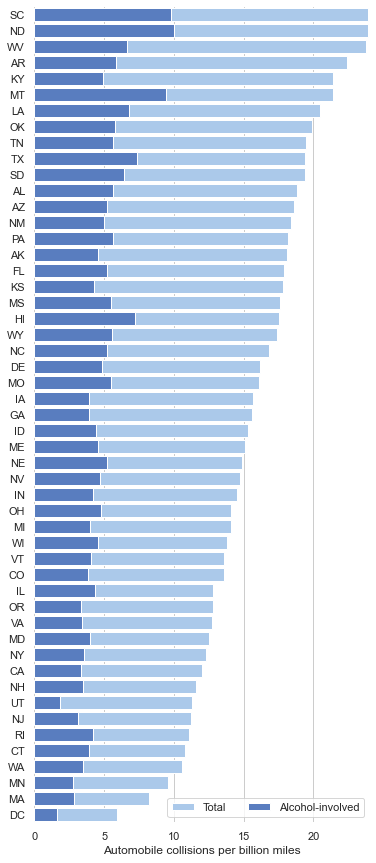

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Load the example car crash dataset
crashes = sns.load_dataset("car_crashes").sort_values("total", ascending=False)

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total", y="abbrev", data=crashes,
            label="Total", color="b")

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="alcohol", y="abbrev", data=crashes,
            label="Alcohol-involved", color="b")

# Add a legend and informative axis label
ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 24), ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

# [violinplot] [Graphe en violon pour un jeu de donnée large](https://seaborn.pydata.org/examples/wide_form_violinplot.html)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [despine](https://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine)
    - retire les côtés du cadre (spines = colonne vertébrale), par défaut du haut et de droite, mais peut davantage
* [violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html#seaborn.violinplot)

## L'exemple (hardcore) de la galerie

In [2]:
display(sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0))

network           1                     2                     3             \
node              1                     1                     1              
hemi             lh         rh         lh         rh         lh         rh   
0         56.055744  92.031036   3.391576  38.659683  26.203819 -49.715569   
1         55.547253  43.690075 -65.495987 -13.974523 -28.274963 -39.050129   
2         60.997768  63.438793 -51.108582 -13.561346 -18.842947  -1.214659   
3         18.514868  12.657158 -34.576603 -32.665958  -7.420454  17.119448   
4         -2.527392 -63.104668 -13.814151 -15.837989 -45.216927   3.483550   
..              ...        ...        ...        ...        ...        ...   
915       -7.429513  -4.813219  -3.670537   1.442261 -19.680431 -29.109356   
916      -33.554138 -38.605621 -25.664803 -30.252352   5.562785  20.182186   
917      -78.539566 -74.197189 -54.041595 -39.970291 -14.277059 -30.606461   
918     -103.235825 -98.744286 -40.109543 -44.907734  12.109148   1.621340   
919      -36.288868 -10.762070 -30.356262 -23.319504  14.252188 -27.559860   

network          4                     5             ...          16  \
node             1                     1             ...           3   
hemi            lh         rh         lh         rh  ...          rh   
0        47.461037  26.746613 -35.898861  -1.889181  ...    0.607904   
1        -1.210660 -19.012897  19.568010  15.902983  ...   57.495071   
2       -65.575806 -85.777428  19.247454  37.209419  ...   28.317369   
3       -41.800869 -58.610184  32.896915  11.199619  ...   71.439629   
4       -62.613335 -49.076508  18.396759   3.219077  ...   95.597565   
..             ...        ...        ...        ...  ...         ...   
915      -3.376562  -8.764893   0.017912 -25.305094  ...   58.285793   
916      17.911247  24.653582 -32.935612 -21.783203  ...   59.864819   
917      60.628521  62.027023 -32.800556 -37.021500  ...   68.767868   
918      33.765560  55.356071 -14.330512 -17.224781  ...  103.155251   
919      17.279512 -19.060152  26.558777  21.377319  ...  102.086304   

network                                 17                                   \
node              4                      1                     2              
hemi             lh          rh         lh         rh         lh         rh   
0        -70.270546   77.365776 -21.734550   1.028253   7.791784  68.903725   
1        -76.393219  127.261360 -13.035799  46.381824 -15.752450  31.000332   
2          9.063977   45.493263  26.033442  34.212200   1.326110 -22.580757   
3         65.842979  -10.697547  55.297466   4.255006  -2.420144  12.098393   
4         50.960453  -23.197300  43.067562  52.219875  28.232882 -11.719750   
..              ...         ...        ...        ...        ...        ...   
915       68.557411   22.833048  76.179489  51.934669  -6.614513  -6.690762   
916       23.004578    7.657463  50.962399  13.696922  63.503616  57.401176   
917       49.664017   64.551498  43.800747   8.144480  47.281460  70.499649   
918      106.454849    9.046827  46.674419  40.954796   0.877180  37.577152   
919       80.051140   -2.642610 -12.229620  -6.596726  17.665163  16.153173   

network                                    
node             3                      4  
hemi            lh          rh         lh  
0       -10.520872  120.490463 -39.686432  
1       -39.607521   24.764011 -36.771008  
2        12.985169  -75.027451   6.434262  
3       -15.819172  -37.361431  -4.650954  
4         5.453649    5.169828  87.809135  
..             ...         ...        ...  
915      22.893030   48.274380  76.228455  
916      24.974548   51.972153  64.538788  
917      66.994400   81.539246  64.969772  
918      20.517746    3.124434  56.718388  
919       8.300399   33.687531  17.960655  

[920 rows x 62 columns]

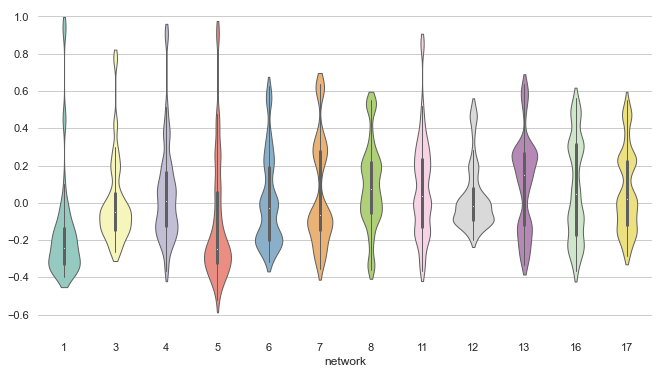

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Load the example dataset of brain network correlations
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Pull out a specific subset of networks
used_networks = [1, 3, 4, 5, 6, 7, 8, 11, 12, 13, 16, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Compute the correlation matrix and average over networks => là je suis plus ou moins largué
corr_df = df.corr().groupby(level="network").mean()
corr_df.index = corr_df.index.astype(int)
corr_df = corr_df.sort_index().T

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 6))

# Draw a violinplot with a narrower bandwidth than the default
sns.violinplot(data=corr_df, palette="Set3", bw=.2, cut=1, linewidth=1)

# Finalize the figure
ax.set(ylim=(-.7, 1.05))
sns.despine(left=True, bottom=True)

## Exemples de la doc

In [6]:
import seaborn as sns
sns.set_theme(style='whitegrid')
tips = sns.load_dataset('tips')
display(tips)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


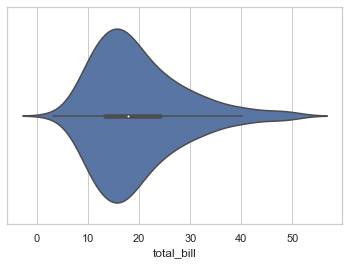

In [10]:
ax = sns.violinplot(x=tips["total_bill"])

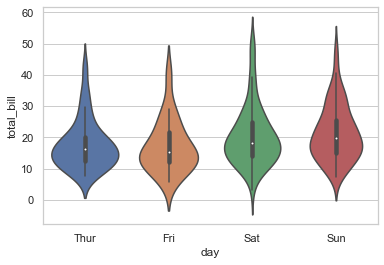

In [8]:
ax = sns.violinplot(x="day", y="total_bill", data=tips)

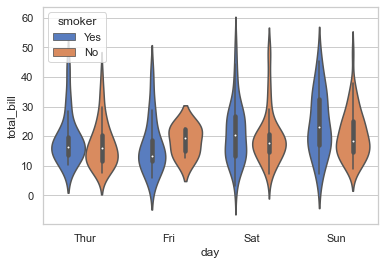

In [9]:
ax = sns.violinplot(x="day", y="total_bill", hue="smoker",
                    data=tips, palette="muted")

# [JointGrid] [Densité de noyau lisse avec histogrammes marginaux](https://seaborn.pydata.org/examples/smooth_bivariate_kde.html)

Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [JointGrid](https://seaborn.pydata.org/generated/seaborn.JointGrid.html#seaborn.JointGrid)

In [16]:
display(sns.load_dataset('penguins'))

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


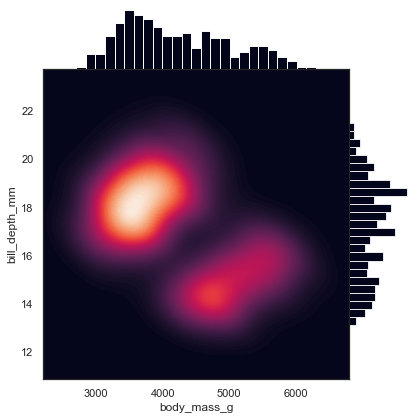

In [15]:
import seaborn as sns
sns.set_theme(style='white')

df = sns.load_dataset('penguins')

g = sns.JointGrid(data=df, x='body_mass_g', y='bill_depth_mm', space=0)
g.plot_joint(sns.kdeplot,
             fill=True, clip=((2200, 6800), (10, 25)),
             thresh=0, levels=100, cmap='rocket')
g.plot_marginals(sns.histplot, color='#03051A', alpha=1, bins=25)

# [clustermap] [Découverte de la structure dans les données de carte thermique](https://seaborn.pydata.org/examples/structured_heatmap.html)


Illustration de :
* [set_theme](https://seaborn.pydata.org/generated/seaborn.set_theme.html#seaborn.set_theme)
    - tuto [Contrôler l'esthétique des figuers](https://seaborn.pydata.org/tutorial/aesthetics.html)
    - tuto [Choisir les palettes de couleurs](https://seaborn.pydata.org/tutorial/color_palettes.html)
* [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)
    - faire un petit tour, surtout pour s'inspirer de leur manière de faire : tous les dataset d'exemples
* [husl_palette](https://seaborn.pydata.org/generated/seaborn.husl_palette.html#seaborn.husl_palette)
* [clustermap](https://seaborn.pydata.org/generated/seaborn.clustermap.html#seaborn.clustermap)

Hardcore, je suis largué !!

## L'exemple (hardcore) de la galerie

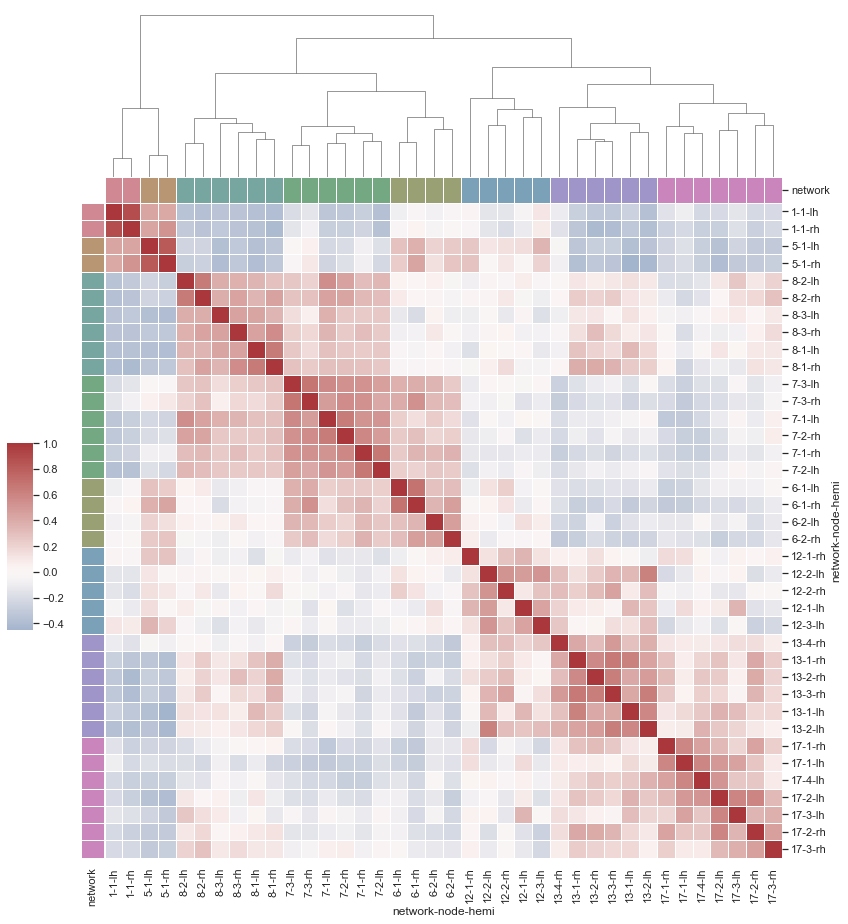

In [17]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns
    .get_level_values("network")
    .astype(int)
    .isin(used_networks)
)
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

## Exemples de la doc

In [19]:
display(sns.load_dataset("iris"))

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


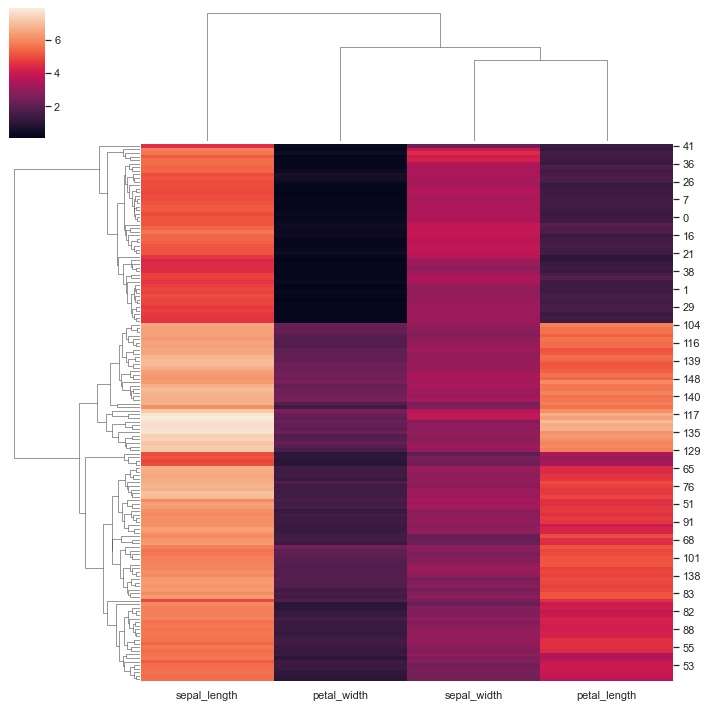

In [18]:
import seaborn as sns; sns.set_theme(color_codes=True)

iris = sns.load_dataset("iris")
species = iris.pop("species")
g = sns.clustermap(iris)

# Les datasets intégrés

Voir [load_dataset](https://seaborn.pydata.org/generated/seaborn.load_dataset.html#seaborn.load_dataset)

Name of the dataset ({name}.csv on https://github.com/mwaskom/seaborn-data)

## seaborn-data

Data repository for [seaborn](http://seaborn.pydata.org/) examples.

| :warning: This is not a general-purpose data archive :warning: |
| :---: |

This repository exists only to provide a convenient target for the `seaborn.load_dataset` function to download sample datasets from. Its existence makes it easy to document seaborn without confusing things by spending time loading and munging data. The datasets may change or be removed at any time if they are no longer useful for the seaborn documentation. Some of the datasets have also been modifed from their canonical sources.

## Data sources

A partial list of where these datasets originate from.

- `anagrams`: https://psych252.github.io/
- `anscombe`: https://en.wikipedia.org/wiki/Anscombe%27s_quartet
- `attention`: https://psych252.github.io/
- `car_crashes`: https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset
- `diamonds`: https://ggplot2.tidyverse.org/reference/diamonds.html
- `dots`: https://shadlenlab.columbia.edu/resources/RoitmanDataCode.html
- `dowjones`: https://fred.stlouisfed.org/series/M1109BUSM293NNBR
- `exercise`: https://psych252.github.io
- `fmri`: https://github.com/mwaskom/Waskom_CerebCortex_2017
- `geyser`: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/faithful.html
- `glue`: https://gluebenchmark.com/leaderboard
- `healthexp`: https://ourworldindata.org/grapher/life-expectancy-vs-health-expenditure
- `iris`: https://archive.ics.uci.edu/ml/datasets/iris
- `mpg`: https://data.world/dataman-udit/cars-data
- `penguins`: https://github.com/allisonhorst/penguins
- `planets`: https://exoplanets.nasa.gov/exoplanet-catalog/
- `seaice`: https://nsidc.org/arcticseaicenews/sea-ice-tools/
- `taxis`:  https://www1.nyc.gov/site/tlc/about/tlc-trip-record-data.page
- `tips`: https://rdrr.io/cran/reshape2/man/tips.html
- `titanic`: https://www.kaggle.com/c/titanic/data


In [12]:
# -> data_home=project_dir/data/seaborn : SEABORN_DATA environment variable and defaults to ~/seaborn-data.
sns.get_data_home()

'C:\\Users\\franc\\seaborn-data'

In [ ]:
# https://en.wikipedia.org/wiki/Anscombe%27s_quartet
display(sns.load_dataset("anagrams", index_col=0))

In [1]:
display(sns.load_dataset("anscombe", index_col=0).head())

NameError: name 'sns' is not defined